In [1]:
import tensorflow as tf
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
import os
import h5py
import pandas as pd
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Activation, Flatten, MaxPooling2D, Dropout
import random
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = (32,32,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))   
model.add(Flatten())
model.add(Dense(46))
model.add(Activation('softmax'))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [3]:
datadir = "DevanagariHandwrittenCharacterDataset/Train"
list_folder = []
for i in os.listdir(datadir):
    list_folder.append(i)

In [4]:
list_folder.sort()

In [5]:
labels1 = {}
count=0
for j in list_folder:
    labels1[j]=count
    count+=1

In [6]:
list_folder

['character_10_yna',
 'character_11_taamatar',
 'character_12_thaa',
 'character_13_daa',
 'character_14_dhaa',
 'character_15_adna',
 'character_16_tabala',
 'character_17_tha',
 'character_18_da',
 'character_19_dha',
 'character_1_ka',
 'character_20_na',
 'character_21_pa',
 'character_22_pha',
 'character_23_ba',
 'character_24_bha',
 'character_25_ma',
 'character_26_yaw',
 'character_27_ra',
 'character_28_la',
 'character_29_waw',
 'character_2_kha',
 'character_30_motosaw',
 'character_31_petchiryakha',
 'character_32_patalosaw',
 'character_33_ha',
 'character_34_chhya',
 'character_35_tra',
 'character_36_gya',
 'character_3_ga',
 'character_4_gha',
 'character_5_kna',
 'character_6_cha',
 'character_7_chha',
 'character_8_ja',
 'character_9_jha',
 'digit_0',
 'digit_1',
 'digit_2',
 'digit_3',
 'digit_4',
 'digit_5',
 'digit_6',
 'digit_7',
 'digit_8',
 'digit_9']

In [8]:
training_data = []
for j in labels1:
    path = os.path.join(datadir,j)
    for k in os.listdir(path):
        new_array = cv2.imread(os.path.join(path,k))
#         new_array = cv2.resize(img_array,(28,28))
        training_data.append([new_array,labels1[j]])

In [9]:
import random
random.shuffle(training_data)
# training_data1  = training_data[:31280]

In [10]:
X = []
Y = []
for features, label in training_data:
    X.append(features)
    Y.append(label)

X = np.array(X)

In [11]:
train_data = keras.utils.normalize(X,axis=1)

In [12]:
train_labels = keras.utils.to_categorical(Y,num_classes=46)

In [13]:
train_data.shape

(78200, 32, 32, 3)

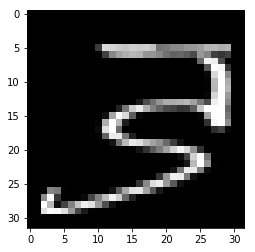

In [14]:
plt.imshow(X[16])

In [15]:
model.fit(train_data,train_labels,batch_size=32,validation_split=0.1,epochs=5)

Train on 70380 samples, validate on 7820 samples
Epoch 1/5
70380/70380 [==============================] - 177s 3ms/step - loss: 1.0566 - acc: 0.6972 - val_loss: 0.3006 - val_acc: 0.9121
Epoch 2/5
70380/70380 [==============================] - 175s 2ms/step - loss: 0.3541 - acc: 0.8883 - val_loss: 0.1824 - val_acc: 0.9418
Epoch 3/5
70380/70380 [==============================] - 174s 2ms/step - loss: 0.2595 - acc: 0.9184 - val_loss: 0.1440 - val_acc: 0.9543
Epoch 4/5
70380/70380 [==============================] - 181s 3ms/step - loss: 0.2167 - acc: 0.9312 - val_loss: 0.1193 - val_acc: 0.9638
Epoch 5/5
70380/70380 [==============================] - 166s 2ms/step - loss: 0.1895 - acc: 0.9396 - val_loss: 0.1153 - val_acc: 0.9616


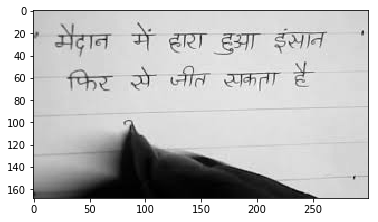

(168, 300)
<class 'numpy.ndarray'>


In [2]:
datadir = "images.jpeg"

img_array = cv2.imread(datadir,cv2.IMREAD_GRAYSCALE)
# img_array = cv2.resize(img_array,(150,150))
plt.imshow(img_array,cmap="gray")
plt.show()
print(img_array.shape)
print(type(img_array))
# img_array = cv2.resize(img_array)

In [3]:
test_array=img_array
ret,thresh = cv2.threshold(test_array,127,255,cv2.THRESH_BINARY_INV)
datadir = "/home/sabu/handwriting recognition/save_images_lines"
krnl = np.ones((5,20), np.uint8)
img_dilate = cv2.dilate(thresh, krnl, iterations=1)
im1,cnts, hierarchy = cv2.findContours(img_dilate.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
sorted_cnts = sorted(cnts, key=lambda cnt: cv2.boundingRect(cnt)[0])

for j, cnt in enumerate(sorted_cnts):
    x, y, w, h = cv2.boundingRect(cnt)

    region_int = test_array[y:y+h, x:x+w]
    NAME = "seg_{}.jpg".format(int(time.time()))
    temp = os.path.join(datadir,NAME)
    cv2.imwrite(temp,region_int)
#     list_images1.append(region_int)
    cv2.imshow('segment no:'+str(j),region_int)
    cv2.rectangle(test_array,(x,y),( x + w, y + h ),(90,0,255),2)
    cv2.waitKey(1000)
cv2.destroyAllWindows()

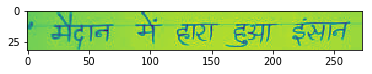

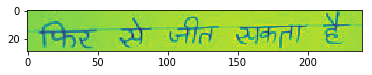

In [4]:
datadir1 = "save_images_lines"
datadir3 = "/home/sabu/handwriting recognition/save_images_words"
list1 = []
for l in os.listdir(datadir1):
    list1.append(l)
list1.sort()
# test_array = cv2.resize(img_array,None,fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
def testing_data1():
    for k in list1:
        test_array = cv2.imread(os.path.join(datadir1,k),cv2.IMREAD_GRAYSCALE)
        plt.imshow(test_array)
        plt.show()
        ret,thresh = cv2.threshold(test_array,127,255,cv2.THRESH_BINARY_INV)
#         test_array = cv2.resize(test_array,(150,150))
        #         test_array = cv2.resize(test_array,(150,150))
        krnl = np.ones((5,5), np.uint8)
        img_dilate = cv2.dilate(thresh, krnl, iterations=1)
        im4,cnts, hierarchy = cv2.findContours(img_dilate.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        sorted_cnts = sorted(cnts, key=lambda cnt: cv2.boundingRect(cnt)[0])
        
        for j, cnt1 in enumerate(sorted_cnts):
            x, y, w, h = cv2.boundingRect(cnt1)

            region_int = test_array[y:y+h, x:x+w]
            NAME1 = "seg_{}.jpg".format(int(time.time()))
            temp1 = os.path.join(datadir3,NAME1)
            cv2.imwrite(temp1,region_int)
#             list_images1.append(region_int)
            cv2.imshow('segment no:'+str(j),region_int)
            cv2.rectangle(test_array,(x,y),( x + w, y + h ),(90,0,255),2)
            cv2.waitKey(1000)

        cv2.imshow('marked areas',test_array)
        cv2.waitKey(1000)
        cv2.destroyAllWindows()            
testing_data1()

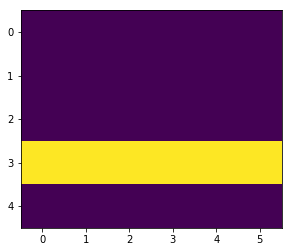

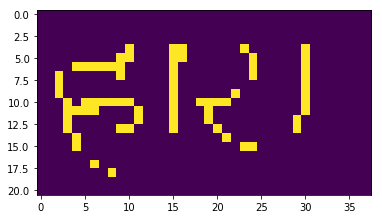

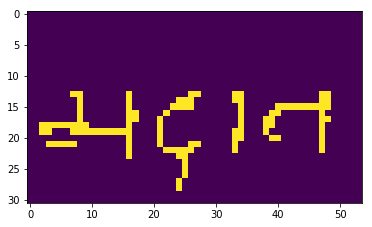

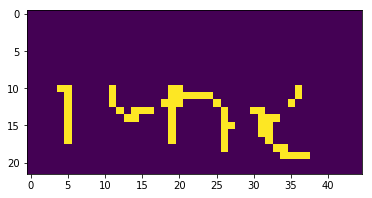

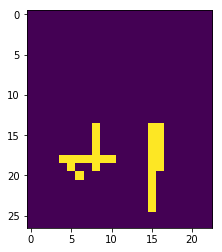

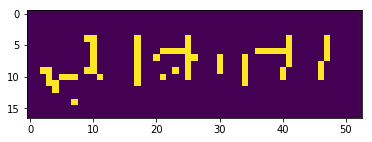

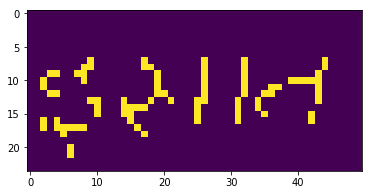

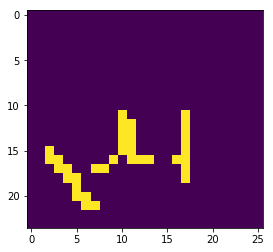

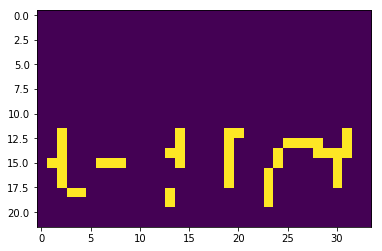

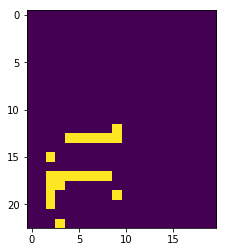

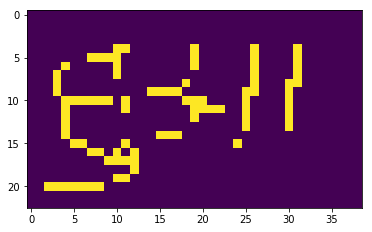

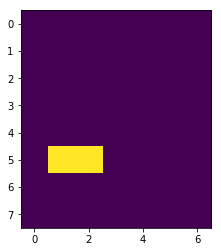

In [5]:
datadir4 = "save_images_words"
datadir5 = "/home/sabu/handwriting recognition/save_images_character"

def testing_data2():
    for l in os.listdir(datadir4):
        test_array = cv2.imread(os.path.join(datadir4,l),cv2.IMREAD_GRAYSCALE)
        ret,thresh = cv2.threshold(test_array,130,255,cv2.THRESH_BINARY_INV)
        temp_variable = np.argmax(thresh.sum(axis=1))
        for i in range(0,int(temp_variable+2)):
            thresh[i]=0
        plt.imshow(thresh)
        plt.show()
        krnl = np.ones((3,3), np.uint8)
        img_dilate = cv2.dilate(thresh, krnl, iterations=1)
        im4,cnts, hierarchy = cv2.findContours(img_dilate.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        sorted_cnts = sorted(cnts, key=lambda cnt: cv2.boundingRect(cnt)[0])

        for j, cnt1 in enumerate(sorted_cnts):
            x, y, w, h = cv2.boundingRect(cnt1)

            region_int = thresh[y:y+h, x:x+w]
            NAME1 = "seg_{}.jpg".format(int(time.time()))
            temp1 = os.path.join(datadir5,NAME1)
            cv2.imwrite(temp1,region_int)
        #     list_images1.append(region_int)
            cv2.imshow('segment no:'+str(j),region_int)
            cv2.rectangle(thresh,(x,y),( x + w, y + h ),(90,0,255),2)
            cv2.waitKey(1000)
        cv2.destroyAllWindows()
testing_data2()